# Task 1

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

In [4]:
dict_data = load_wine(as_frame=True)
data = dict_data['data']
data['target_class'] = dict_data['target']
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
data.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target_class
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [6]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=12)
train_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target_class
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0,0
31,13.58,1.66,2.36,19.1,106.0,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515.0,0
143,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550.0,2
33,13.76,1.53,2.70,19.5,132.0,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235.0,0
108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0,2
134,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650.0,2
155,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2


In [7]:
x_test, y_test = test_data.drop(columns=['target_class']), test_data['target_class']
x_train, y_train = train_data.drop(columns=['target_class']), train_data['target_class']

In [8]:
class KNearestNeighbours:
    def __init__(self, n_neighbours):
        self.n = n_neighbours
    
    def fit(self, X, y):
        self.features = X
        self.classes = y
    
    def predict_class(self, x):
        distances = []
        
        for index, neighbour in enumerate(self.features):
            distance = np.linalg.norm(x - neighbour)
            distances.append([distance, index])
        
        distances.sort()
        neighbours = distances[:self.n]
        
        neighbour_classes = [self.classes[i] for distance, i in neighbours]
        occurence_count = Counter(neighbour_classes)
        
        return occurence_count.most_common(1)[0][0]
    
    def predict(self, X):
        predictions = []
        
        for vector in X:
            predictions.append(self.predict_class(vector))
        
        return predictions

In [9]:
classifier = KNearestNeighbours(5)

classifier.fit(x_train.to_numpy(), y_train.to_numpy())
y_pred = classifier.predict(x_test.to_numpy())

print(y_pred)

[2, 1, 0, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 0, 1, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1]


In [10]:
accuracy_score(y_test, y_pred)

0.7222222222222222

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.62      0.72      0.67        18
           2       0.57      0.50      0.53        16

    accuracy                           0.72        54
   macro avg       0.71      0.71      0.71        54
weighted avg       0.73      0.72      0.72        54



# Task 2

In [12]:
import matplotlib.pyplot as plt

In [13]:
visualization_data = data[['od280/od315_of_diluted_wines', 'flavanoids', 'target_class']]
visualization_data

,od280/od315_of_diluted_wines,flavanoids,target_class
0,3.92,3.06,0
1,3.40,2.76,0
2,3.17,3.24,0
3,3.45,3.49,0
4,2.93,2.69,0
...,...,...,...
173,1.74,0.61,2
174,1.56,0.75,2
175,1.56,0.69,2
176,1.62,0.68,2


In [14]:
data_c0 = data[data['target_class'] == 0] 
data_c1 = data[data['target_class'] == 1] 
data_c2 = data[data['target_class'] == 2] 

In [15]:
x0, y0 = data_c0['od280/od315_of_diluted_wines'], data_c0['flavanoids']
x1, y1 = data_c1['od280/od315_of_diluted_wines'], data_c1['flavanoids']
x2, y2 = data_c2['od280/od315_of_diluted_wines'], data_c2['flavanoids']

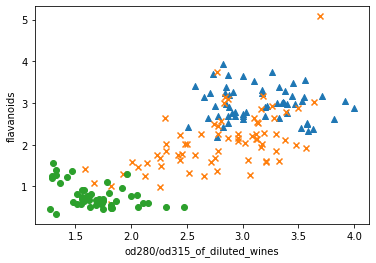

In [16]:
plt.scatter(x0, y0, marker='^')
plt.scatter(x1, y1, marker='x')
plt.scatter(x2, y2, marker='o')

plt.xlabel('od280/od315_of_diluted_wines')
plt.ylabel('flavanoids')

plt.show()

Ну это даже хуже, чем квадраты Кастиара...

Автор сей лабораторной работы не смог дозвониться до Жака Фреско, но друг сказал, что у него такое пробегало перед глазами, когда ему защемило спину. Звучит как что-то знакомое программистам.

In [20]:
a = np.array([[1, 2], [3, 4]])
print(a, type(a[0]))

[[1 2]
 [3 4]] <class 'numpy.ndarray'>
